# Desafio Final - 21/12/2019

![Codenation](img/codenation_ds.png) <br><br>
![Banco Inter](img/banco-inter-logo.png)
## Squad 4
> Autores 
```
>- Nilson Cunha    | nilsoncunha
>- Otávio Miranda  | otavioacm
>- Rafael Barbosa  | rlbarbosa
>- Roberth Macedo  | macedoroberth
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 6)

sns.set()

In [3]:
# Carregando a base

market = pd.read_csv('../desafio/estaticos_market.csv')
port1 = pd.read_csv('../desafio/port1.csv')
port2 = pd.read_csv('../desafio/port2.csv')
port3 = pd.read_csv('../desafio/port3.csv')

In [4]:
market.head(2)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
market.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
market.isnull().mean()

id                         0.000000
fl_matriz                  0.000000
de_natureza_juridica       0.000000
sg_uf                      0.000000
natureza_juridica_macro    0.000000
                             ...   
qt_funcionarios_24meses    0.775958
tx_crescimento_12meses     0.840172
tx_crescimento_24meses     0.839900
tx_rotatividade            0.775958
qt_filiais                 0.000000
Length: 181, dtype: float64

> *Primeiramente iniciamos nossa análise verificando a informação de dados faltantes e, conforme dados acima, observamos que em algum momento chegamos a ter mais de 70% de dados faltantes. Com isso definimos que iriamos trabalhar somente com aquelas variáveis que tivessem menos de 50% de dados nulos. Removendo essas que fugiam do limite estipulado, no qual dividimos por categorias:*

### Informações Cadastrais - 12 Variáveis
| Coluna                                | Percentual | Descrição                                   | Anotações                             |
|---------------------------------------|------------|---------------------------------------------|---------------------------------------|
| fl_matriz                             | 0%         | Verdadeiro se o CNPJ corresponder a matriz  |                                       |
| de_natureza_juridica                  | 0%         | Carрter da natureza jurьdica                | LTDA, SA,  Empresario individual      |
| SG_UF                                 | 0%         | Estado da companhia                         | Estado geogrрfico                     |
| idade_empresa_anos                    | 0%         | Idade da empresa                            |                                       |
| idade_emp_cat                         | 0%         | intervalo de anos que a empresa possui      |                                       |
| fl_email                              | 0%         | Se hр email registrado na receita           | Pode identificar aptidсo a tecnologia |
| fl_telefone                           | 0%         | Se hр telefone registrado na receita        |                                       |
| fl_rm                                 | 0%         | Indicador de рrea metropolitana             | Indicador de рrea metropolitana       |
| sg_uf_matriz                          | 0%         | Localização da matriz                       |                                       |
| empsetorcensitariofaixarendapopulacao | 31%        | Renda média da região                       |                                       |
| nm_meso_regiao                        | 13%        | Nome da mesorregiсo onde a cia estр alocada |                                       |
| nm_micro_regiao                       | 13%        | Nome da microregiсo onde a cia estр alocada |

### Informações financeiras - 20
| Coluna                              | Percentual | Descritivo                                                      | Anotações                           |
|-------------------------------------|------------|----------------------------------------------------------------|-------------------------------------|
| fl_me                               | 0%         | Microempresa Individual                                        | Atж 360 mil reais/ ano              |
| fl_sa                               | 0%         | Sociedade anЗnima                                              | Sociedade grande porte (normalmene) |
| fl_epp                              | 0%         | Empresa de porte pequeno                                       | entre R$ 360 mil e R$ 3,6 milhшes   |
| fl_mei                              | 0%         | Microempreendedor Individual                                   | Atж 60 mil reais/ ano               |
| fl_ltda                             | 0%         | Limitada                                                       | Sociedade mжdio porte (normalmente) |
| dt_situacao                         | 0%         | Data da situaусo na Receita                                    |                                     |
| fl_st_especial                      | 0%         |                                                                | Falido, em liquidaусo judicial...   |
| fl_optante_simples                  | 18%        | Optante pelo SIMPLES                                       | Correlaусo com a variрvel 14        |
| fl_optante_simei                    | 18%        | Optante pelo SIMEI                                       |                                     |
| de_saude_tributaria                 | 3%         | SE impostos pagos; verde; vermelho                             |                                     |
| de_saude_rescencia                  | 3%         | Tempo de atualizaусo da saude tributaria                       |                                     |
| nu_meses_rescencia                  | 10%        | Número de meses desde a última atualizações de saúde tributária |                                     |
| de_nivel_atividade                  | 2%         | Probabilidade de estar operando                                |                                     |
| fl_simples_irregular                | 0%         | Simples irregular por tipo de atividade ou receita             |                                     |
| fl_passivel_iss                     | 0%         | Verdadeiro caso realize atividades tributрveis                 |                                     |
| de_faixa_faturamento_estimado       | 6%         | Faixa do faturamento estimado                                  |                                     |
| de_faixa_faturamento_estimado_grupo | 6%         | Faixa de faturamento estimado do grupo                         |                                     |
| vl_faturamento_estimado_aux         | 6%         | Valor da receita estimada                                      |                                     |
| vl_faturamento_estimado_grupo_aux   | 6%         | Valor da receita estimada do grupo                             |                                     |
| qt_filiais                          | 0%         | Quantidade de filiais                                          |                                     |

### Informações de veículos - 5
| Coluna                          | Percentual | Descritivo                                         | Anotações                               |
|---------------------------------|------------|---------------------------------------------------|-----------------------------------------|
| fl_spa                          | 0%         | Se a empresa tem seu prзprio posto de combustьvel | Grupo de variрveis setor de transportes |
| fl_antt                         | 0%         | Certificada para fins de transporte               |                                         |
| fl_veiculo                      | 0%         | Se a empresa possuь ao menos um veьculo           |                                         |
| vl_total_veiculos_pesados_grupo | 0%         | Valor dos veьculos leves da empresa               |                                         |
| vl_total_veiculos_leves_grupo   | 0%         | Valor dos veьculos pesados da empresa             |                                         |

### Setor de Atuação - 5
| Coluna                  | Percentual | Descritivo                        | Anotações                                                                        |
|-------------------------|------------|----------------------------------|----------------------------------------------------------------------------------|
| natureza_juridica_macro | 0%         | Natureza da empresa              | Administracao publica, cargo politico...                                         |
| de_ramo                 | 0%         | Ramo de atuaусo da empresa       | Verificar o ramo de atuaусo das empresas por portfзlio e verificar similaridades |
| setor                   | 0%         | setor de atuaусo                 | Comercio, serviуo, indЩstria...                                                  |
| nm_divisao              | 0%         | Descriусo da atividade econЗmica | Descriусo mais completa sobre o setor de atuaусo                                 |
| nm_segmento             | 0%         | Descriусo da atividade econЗmica |                                                                                  

### Informações dos sócios - 7
| Coluna               | Percentual | Descrição                                | Anotações                        |
|----------------------|------------|------------------------------------------|----------------------------------|
| qt_socios            | 25%        | Quantidade de sзcios                     | Se relaciona com LTDA/AS -> GRP2 |
| qt_socios_pf         | 25%        | Quantidade de sзcios PF                  |                                  |
| qt_socios_pj         | 25%        | Quanidade de sзcios PJ                   |                                  |
| idade_media_socios   | 33%        | Idade mжdia dos sзcios                   |                                  |
| idade_maxima_socios  | 33%        | Idade mрxima dos sзcios                  |                                  |
| idade_minima_socios  | 33%        | Idade mьnima dos sзcios                  |                                  |
| qt_socios_st_regular | 34%        | Quanidade de sзcios regulares na Receita |                                  |


## > Iniciando a análise exploratória em cada grupo

In [7]:
# Seleciona apenas os dados com menos de 50% de nulos 
market = market.loc[:, market.isnull().mean() < 0.5]

In [8]:
market.shape

(462298, 50)

> *Inserindo os portifólios na base de market*

In [9]:
market['port1'] = market.id.isin(port1.id)
market['port2'] = market.id.isin(port2.id)
market['port3'] = market.id.isin(port3.id)
market['idc_market'] = 1

In [10]:
market[['id','port1', 'port2', 'port3','idc_market']].head()

,id,port1,port2,port3,idc_market
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,False,False,False,1
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,False,False,False,1
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,False,False,False,1
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,False,False,False,1
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,False,False,False,1


### Análise referente ao grupo `Cadastros`

In [11]:
features_cadastrais = [
'id',
'fl_matriz',
'de_natureza_juridica',
'sg_uf',
'idade_empresa_anos',
'idade_emp_cat',
'fl_email',
'fl_telefone',
'fl_rm',
'sg_uf_matriz',
'empsetorcensitariofaixarendapopulacao',
'nm_meso_regiao',
'nm_micro_regiao',
'port1',
'port2',
'port3']

> *Criando nova coluna que diz se é do `Setor privado` ou `Setor público`*

In [12]:
natureza_privado = ['SOCIEDADE EMPRESARIA LIMITADA', 'EMPRESARIO INDIVIDUAL', 'COOPERATIVA', 'ASSOCIACAO PRIVADA', 
'ENTIDADE SINDICAL', 'CONSORCIO DE SOCIEDADES', 'SOCIEDADE DE ECONOMIA MISTA', 'CONDOMINIO EDILICIO', 'SOCIEDADE ANONIMA ABERTA',
'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA', 'EMPRESA INDIVIDUAL IMOBILIARIA',
'SOCIEDADE SIMPLES LIMITADA', 'FUNDACAO PRIVADA', 'SOCIEDADE ANONIMA FECHADA',  'ORGANIZACAO RELIGIOSA',
'SOCIEDADE UNIPESSOAL DE ADVOCACIA', 'SOCIEDADE SIMPLES PURA', 'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES', 'SERVICO NOTARIAL E REGISTRAL CARTORIO', 
'ORGANIZACAO SOCIAL OS', 'CONSORCIO PUBDE DIREITO PUB ASS PUB', 'SERVICO SOCIAL AUTONOMO', 'SOCIEDADE EM CONTA DE PARTICIPACAO',
'GRUPO DE SOCIEDADES', 'SOCIEDADE MERCANTIL DE CAPITAL E INDUSTRIA', 'SOCIEDADE EMPRESARIA EM COMANDITA POR ACOES',
'ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA', 'ENTIDADE DE MEDIACAO E ARBITRAGEM', 'COMUNIDADE INDIGENA',
'ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS','CLUBE FUNDO DE INVESTIMENTO', 'REPRESENTACAO DIPLOMATICA ESTRANGEIRA',
'SOCIEDADE SIMPLES EM COMANDITA SIMPLES', 'FRENTE PLEBISCITARIA OU REFERENDARIA', 'SOCIEDADE EMPRESARIA EM COMANDITA SIMPLES',
'CONSORCIO DE EMPREGADORES', 'SOCIEDADE SIMPLES EM NOME COLETIVO', 'FUNDO PRIVADO']

natureza_publico = ['ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL', 'MUNICIPIO', 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO',
'CANDIDATO A CARGO POLITICO ELETIVO', 'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL', 'AUTARQUIA FEDERAL', 'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL',
'EMPRESA PUBLICA', 'AUTARQUIA MUNICIPAL', 'FUNDO PUBLICO', 'AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL',
'FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL', 'ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL', 'ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO',
'FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL', 'ORGAO PUBLICO AUTONOMO MUNICIPAL', 'ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL',
'FUNDACAO PUBLICA DE DIREITO PUBFEDERAL', 'ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL', 'FUNDACAO PUB DE DIREITO PUB EST OU DO DF',
'ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL', 'FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL',
'CONSORCIO PUBLICO DE DIREITO PRIVADO', 'ESTADO OU DISTRITO FEDERAL', 'ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL',
'ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO']

In [13]:
market['setor_privado'] = np.where(market['de_natureza_juridica'].isin(natureza_privado), True, False)

> *Fazendo a transformação da variável `fl_rm` para bool*

In [14]:
market['fl_rm'] = market['fl_rm'].map({'SIM': True, 'NAO': False})

> *Verificando a quantidade de matriz que existe no portfólio*

Text(0.5, 1.0, 'Quantidade de Matriz')

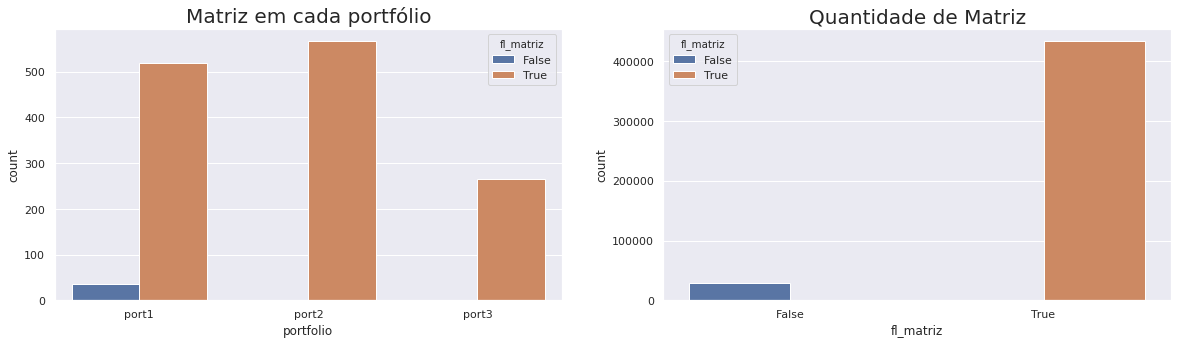

In [15]:
cliente_matriz = pd.DataFrame()
portfolio1 = market.loc[market['port1'], 'fl_matriz']
portfolio2 = market.loc[market['port2'], 'fl_matriz']
portfolio3 = market.loc[market['port3'], 'fl_matriz']


portfolio1 = portfolio1.to_frame()
portfolio1.reset_index(drop=True, inplace=True)
portfolio1['portfolio'] = 'port1'

portfolio2 = portfolio2.to_frame()
portfolio2.reset_index(drop=True, inplace=True)
portfolio2['portfolio'] = 'port2'

portfolio3 = portfolio3.to_frame()
portfolio3.reset_index(drop=True, inplace=True)
portfolio3['portfolio'] = 'port3'


cliente_matriz = pd.concat([portfolio1, portfolio2, portfolio3])

f, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='portfolio', hue='fl_matriz', data=cliente_matriz, ax=axs[0]);
axs[0].set_title("Matriz em cada portfólio", fontsize=20)

sns.countplot(x='fl_matriz', hue='fl_matriz', data=market, ax=axs[1]);
axs[1].set_title("Quantidade de Matriz", fontsize=20)

> *Verificando como está distribuido as empresas em relação a `Natureza Jurídica`*

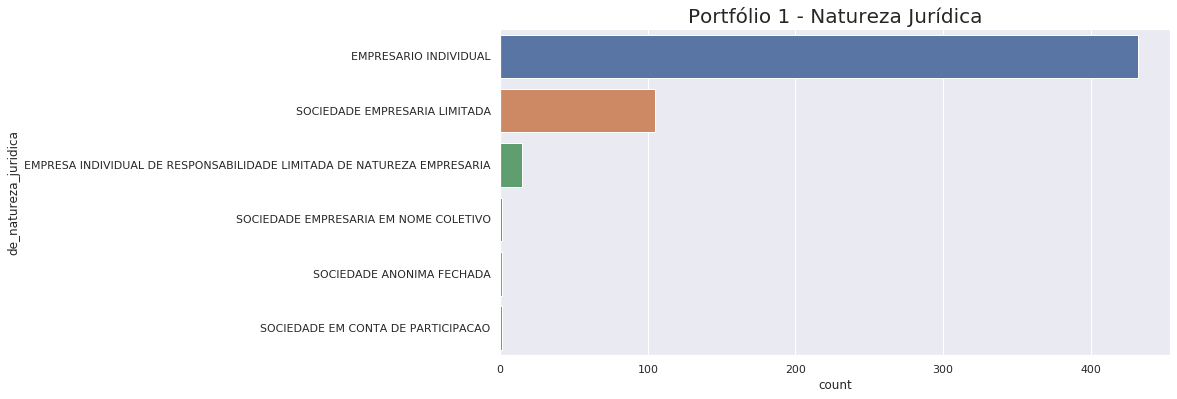

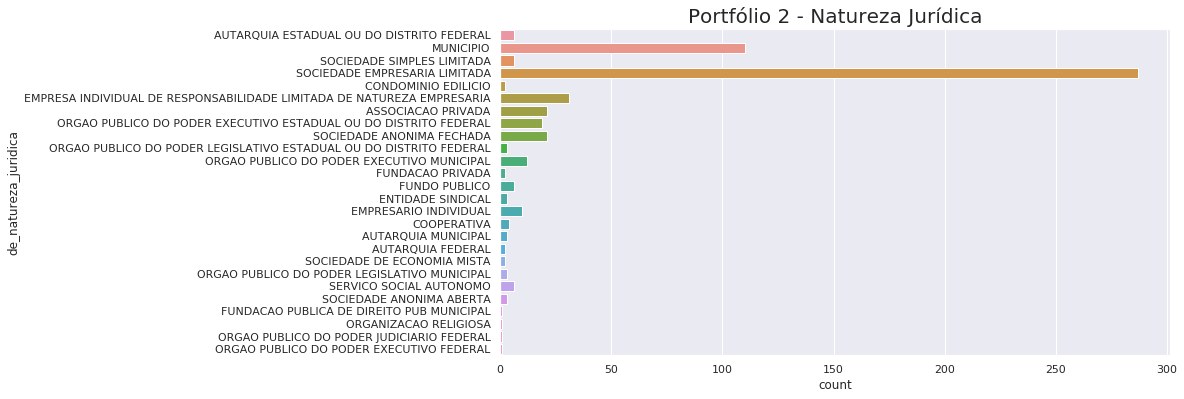

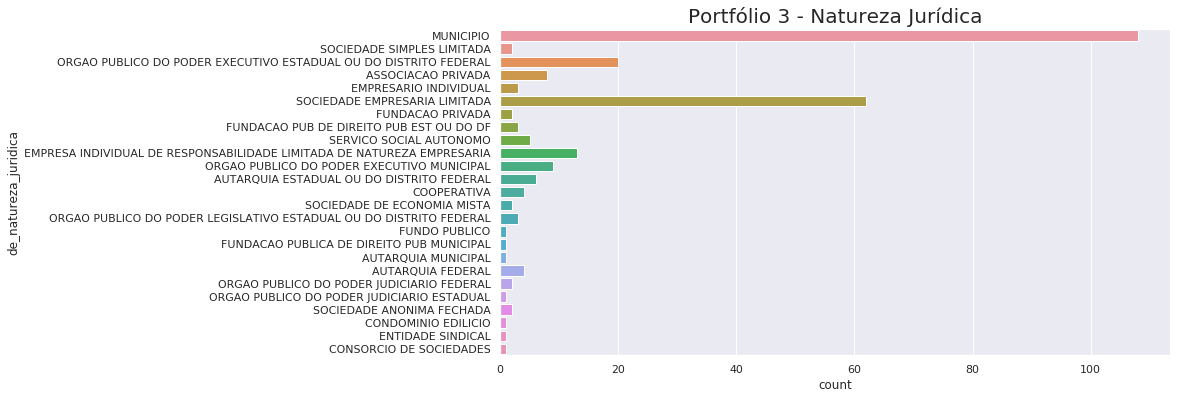

In [16]:
sns.countplot(y='de_natureza_juridica', data=market.loc[market['port1']])
plt.title('Portfólio 1 - Natureza Jurídica', fontsize=20)
plt.show()
print('')
sns.countplot(y='de_natureza_juridica', data=market.loc[market['port2']])
plt.title('Portfólio 2 - Natureza Jurídica', fontsize=20)
plt.show()
print('')
sns.countplot(y='de_natureza_juridica', data=market.loc[market['port3']])
plt.title('Portfólio 3 - Natureza Jurídica', fontsize=20)
plt.show()

> *Temos varios tipos de natureza jurídica em nossa base*

In [17]:
market['de_natureza_juridica'].unique()

array(['SOCIEDADE EMPRESARIA LIMITADA', 'EMPRESARIO INDIVIDUAL',
       'COOPERATIVA', 'ASSOCIACAO PRIVADA', 'ENTIDADE SINDICAL',
       'CONSORCIO DE SOCIEDADES', 'SOCIEDADE DE ECONOMIA MISTA',
       'CONDOMINIO EDILICIO', 'ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL',
       'MUNICIPIO', 'ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO',
       'SOCIEDADE ANONIMA ABERTA',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'CANDIDATO A CARGO POLITICO ELETIVO',
       'EMPRESA INDIVIDUAL IMOBILIARIA',
       'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'SOCIEDADE SIMPLES LIMITADA', 'FUNDACAO PRIVADA',
       'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL',
       'SOCIEDADE ANONIMA FECHADA', 'ORGANIZACAO RELIGIOSA',
       'SOCIEDADE UNIPESSOAL DE ADVOCACIA', 'SOCIEDADE SIMPLES PURA',
       'AUTARQUIA FEDERAL', 'ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL',
       'EMPRESA PUBLICA', 'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
      

In [18]:
group_natureza = market.groupby(['de_natureza_juridica']).size().reset_index(name='counts')
group_natureza.sort_values('counts', ascending=False)

,de_natureza_juridica,counts
17,EMPRESARIO INDIVIDUAL,295756
60,SOCIEDADE EMPRESARIA LIMITADA,91231
0,ASSOCIACAO PRIVADA,29694
13,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,15183
37,ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,7301
...,...,...
8,CONSORCIO DE EMPREGADORES,1
11,CONSORCIO PUBLICO DE DIREITO PRIVADO,1
30,FUNDO PRIVADO,1
38,ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,1


Text(0.5, 1.0, 'Portfólio 3')

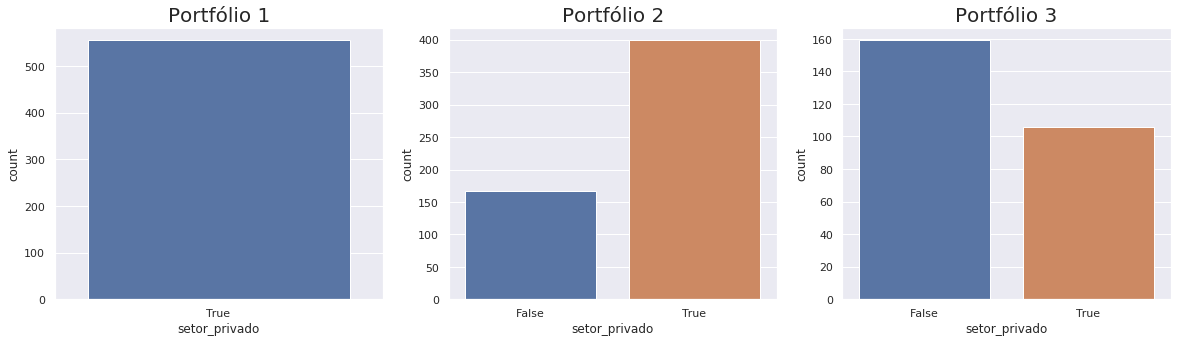

In [19]:
f, axs = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x='setor_privado', data=market.loc[market['port1']], ax=axs[0])
axs[0].set_title("Portfólio 1", fontsize=20)
sns.countplot(x='setor_privado', data=market.loc[market['port2']], ax=axs[1])
axs[1].set_title("Portfólio 2", fontsize=20)
sns.countplot(x='setor_privado', data=market.loc[market['port3']], ax=axs[2])
axs[2].set_title("Portfólio 3", fontsize=20)

> Verificando em quais estados estão as matriz

In [20]:
group_uf_matriz = market.groupby(['sg_uf_matriz']).size().reset_index(name='counts')
group_uf_matriz.sort_values('counts', ascending=False)

,sg_uf_matriz,counts
9,MA,124823
19,RN,96743
2,AM,80032
16,PI,75201
20,RO,54876
0,AC,20028
25,SP,2845
6,DF,1225
5,CE,927
18,RJ,669


In [21]:
print("Estados - {} - total {}".format(market['sg_uf'].unique(), len(market['sg_uf'].unique())))
print("Estados da Matriz - {} - total {}".format(market['sg_uf_matriz'].unique(), len(market['sg_uf_matriz'].unique())))

Estados - ['RN' 'PI' 'AM' 'MA' 'RO' 'AC'] - total 6
Estados da Matriz - ['RN' 'PI' 'AM' 'MA' 'RO' 'AC' 'DF' nan 'CE' 'PB' 'SP' 'PR' 'ES' 'PE' 'MG'
 'RJ' 'RS' 'GO' 'SC' 'BA' 'MT' 'MS' 'PA' 'RR' 'TO' 'AP' 'SE' 'AL'] - total 28


In [22]:
estados_port1 = sorted(market.loc[market['port1'], 'sg_uf'].unique().tolist())
estados_port2 = sorted(market.loc[market['port2'], 'sg_uf'].unique().tolist())
estados_port3 = sorted(market.loc[market['port3'], 'sg_uf'].unique().tolist())
print(estados_port1)
print(estados_port2)
print(estados_port3)

['AC', 'AM', 'MA', 'PI', 'RN', 'RO']
['AC', 'AM', 'MA', 'PI', 'RN', 'RO']
['AC', 'AM', 'MA', 'PI', 'RN', 'RO']


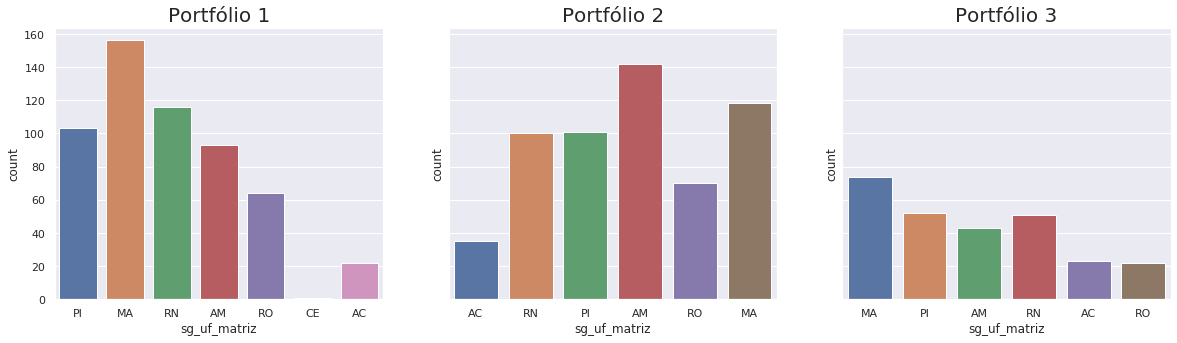

In [23]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)

sns.countplot(x='sg_uf_matriz', data = market.loc[market['port1']], ax=axs[0])
sns.countplot(x='sg_uf_matriz', data = market.loc[market['port2']], ax=axs[1])
sns.countplot(x='sg_uf_matriz', data = market.loc[market['port3']], ax=axs[2])
axs[0].set_title("Portfólio 1", fontsize=20)
axs[1].set_title("Portfólio 2", fontsize=20)
axs[2].set_title("Portfólio 3", fontsize=20)
plt.show()

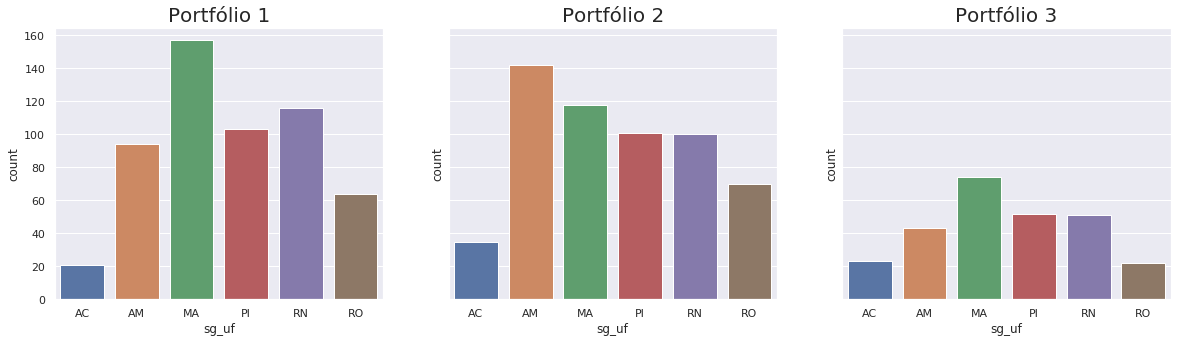

In [24]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)

sns.countplot(x='sg_uf', order=estados_port1, data = market.loc[market['port1']], ax=axs[0])
sns.countplot(x='sg_uf', order=estados_port2, data = market.loc[market['port2']], ax=axs[1])
sns.countplot(x='sg_uf', order=estados_port3, data = market.loc[market['port3']], ax=axs[2])
axs[0].set_title("Portfólio 1", fontsize=20)
axs[1].set_title("Portfólio 2", fontsize=20)
axs[2].set_title("Portfólio 3", fontsize=20)
plt.show()

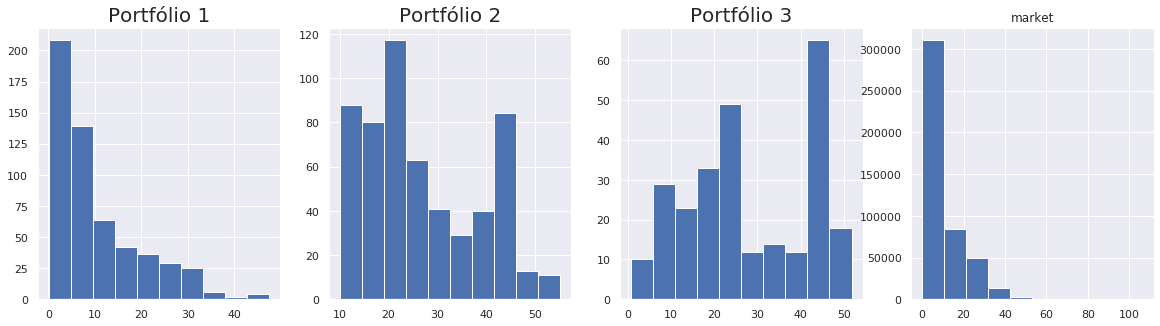

In [25]:
fig, axs = plt.subplots(1,4, figsize=(20,5))
market.loc[market['port1'], 'idade_empresa_anos'].hist(ax=axs[0])
market.loc[market['port2'], 'idade_empresa_anos'].hist(ax=axs[1])
market.loc[market['port3'], 'idade_empresa_anos'].hist(ax=axs[2])
market.loc[~market['port1'], 'idade_empresa_anos'].hist(ax=axs[3])
axs[0].set_title("Portfólio 1", fontsize=20)
axs[1].set_title("Portfólio 2", fontsize=20)
axs[2].set_title("Portfólio 3", fontsize=20)
axs[3].set_title('market')
plt.show()

In [26]:
print('port1', market.loc[market['port1'], 'idade_emp_cat'].unique().tolist())
print('port2', market.loc[market['port2'], 'idade_emp_cat'].unique().tolist())
print('port3', market.loc[market['port3'], 'idade_emp_cat'].unique().tolist())

port1 ['<= 1', '5 a 10', '> 20', '15 a 20', '1 a 5', '10 a 15']
port2 ['10 a 15', '> 20', '15 a 20']
port3 ['> 20', '15 a 20', '5 a 10', '10 a 15', '1 a 5', '<= 1']


In [27]:
order_idade_emp_cat_port1 = ['<= 1', '1 a 5', '5 a 10', '10 a 15', '15 a 20', '> 20']
order_idade_emp_cat_port2 = ['10 a 15', '15 a 20', '> 20']
order_idade_emp_cat_port3 = ['<= 1', '1 a 5', '5 a 10', '10 a 15', '15 a 20', '> 20']

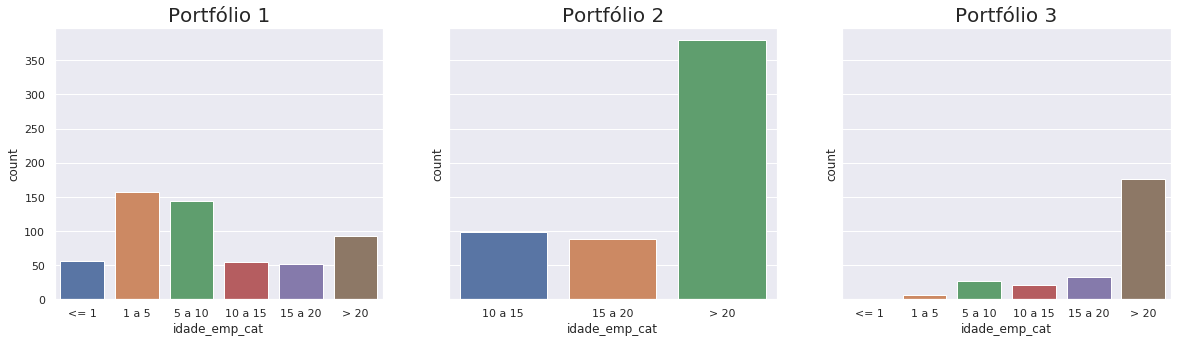

In [28]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port1, data = market.loc[market['port1']], ax=axs[0])
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port2, data = market.loc[market['port2']], ax=axs[1])
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port3, data = market.loc[market['port3']], ax=axs[2])
axs[0].set_title("Portfólio 1", fontsize=20)
axs[1].set_title("Portfólio 2", fontsize=20)
axs[2].set_title("Portfólio 3", fontsize=20)
fig = plt.gcf()
#fig.set_size_inches(15, 7)
plt.show()

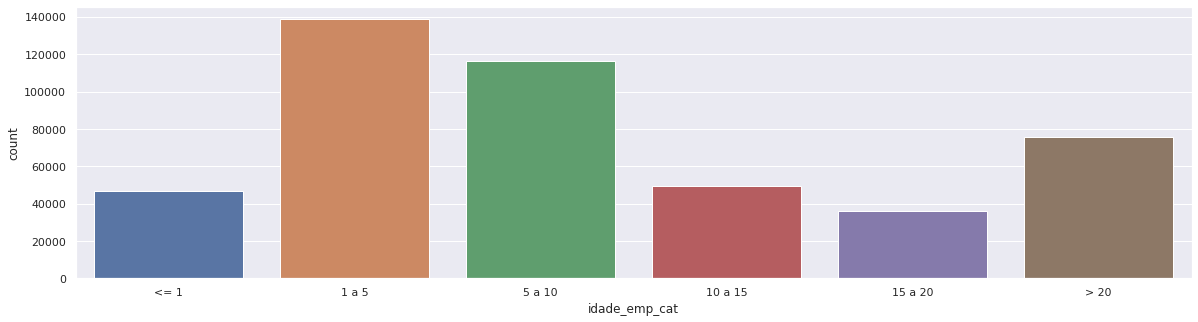

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='idade_emp_cat', order = order_idade_emp_cat_port1, data = market)
plt.show()

In [30]:
port1_nm_meso_regiao = market.loc[market['port1'], 'nm_meso_regiao'].unique()
port2_nm_meso_regiao = market.loc[market['port2'], 'nm_meso_regiao'].unique()
port3_nm_meso_regiao = market.loc[market['port3'], 'nm_meso_regiao'].unique()

print(port1_nm_meso_regiao[~np.isin(port1_nm_meso_regiao, port2_nm_meso_regiao)])
print(port1_nm_meso_regiao[~np.isin(port1_nm_meso_regiao, port3_nm_meso_regiao)])

print(port2_nm_meso_regiao[~np.isin(port2_nm_meso_regiao, port1_nm_meso_regiao)])
print(port2_nm_meso_regiao[~np.isin(port2_nm_meso_regiao, port3_nm_meso_regiao)])

print(port3_nm_meso_regiao[~np.isin(port3_nm_meso_regiao, port1_nm_meso_regiao)])
print(port3_nm_meso_regiao[~np.isin(port3_nm_meso_regiao, port2_nm_meso_regiao)])

[nan 'SUL AMAZONENSE']
[nan]
[nan]
[nan]
[nan]
[nan 'SUL AMAZONENSE']


In [31]:
port1_nm_micro_regiao = market.loc[market['port1'], 'nm_micro_regiao'].unique()
port2_nm_micro_regiao = market.loc[market['port2'], 'nm_micro_regiao'].unique()
port3_nm_micro_regiao = market.loc[market['port3'], 'nm_micro_regiao'].unique()

print(port1_nm_micro_regiao[~np.isin(port1_nm_micro_regiao, port2_nm_micro_regiao)])
print(port1_nm_micro_regiao[~np.isin(port1_nm_micro_regiao, port3_nm_micro_regiao)])

print(port2_nm_micro_regiao[~np.isin(port2_nm_micro_regiao, port1_nm_micro_regiao)])
print(port2_nm_micro_regiao[~np.isin(port2_nm_micro_regiao, port3_nm_micro_regiao)])

print(port3_nm_micro_regiao[~np.isin(port3_nm_micro_regiao, port1_nm_micro_regiao)])
print(port3_nm_micro_regiao[~np.isin(port3_nm_micro_regiao, port2_nm_micro_regiao)])

[nan 'LENCOIS MARANHENSES' 'LITORAL NORDESTE' 'CHAPADINHA' 'JURUA'
 'SENA MADUREIRA' 'MACAU' 'ANGICOS' 'MADEIRA' 'BOCA DO ACRE']
[nan 'CHAPADAS DO EXTREMO SUL PIAUIENSE' 'ITACOATIARA' 'CHAPADINHA' 'CODO'
 'MACAU' 'MADEIRA' 'ALTO PARNAIBA PIAUIENSE' 'CHAPADA DO APODI'
 'PARINTINS' 'BOCA DO ACRE' 'BRASILEIA' 'TEFE']
[nan 'ROSARIO' 'CRUZEIRO DO SUL' 'RIO PRETO DA EVA']
[nan 'TEFE' 'ALTO PARNAIBA PIAUIENSE' 'ITACOATIARA' 'ROSARIO'
 'CRUZEIRO DO SUL' 'BRASILEIA' 'CHAPADA DO APODI' 'CODO' 'PARINTINS'
 'RIO PRETO DA EVA' 'CHAPADAS DO EXTREMO SUL PIAUIENSE']
[nan 'MEDIO OESTE' 'PURUS']
[nan 'MEDIO OESTE' 'LENCOIS MARANHENSES' 'SENA MADUREIRA' 'JURUA' 'PURUS'
 'LITORAL NORDESTE' 'ANGICOS']


In [32]:
len(market.nm_micro_regiao.unique().tolist())

74

### Análise referente ao grupo `Financeiro`

In [33]:
market.groupby(by='fl_mei')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
fl_mei,,,,
False,337.0,566.0,265.0,311398
True,218.0,0.0,0.0,150900


> *Quantos de nossos clientes são MEI?*

In [34]:
market.groupby(by='fl_mei').count()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,port1,port2,port3,idc_market,setor_privado
fl_mei,,,,,,,,,,,,,,,,,,,,,
False,311398,311398,311398,311398,311398,311398,309471,311398,311398,311398,...,303295,303295,303295,303295,311398,311398,311398,311398,311398,311398
True,150900,150900,150900,150900,150900,150900,150900,150900,150900,150900,...,131490,131490,131490,131490,150900,150900,150900,150900,150900,150900


In [35]:
clientes_mei = pd.get_dummies(market['fl_mei'], 'col1', 'col2')
market['cli_mei'] = clientes_mei.col1col2True  # Adicionando uma nova coluna no market

> *Quantos de nossos clientes são optantes pelo Simples?*

In [36]:
cliente_simples = pd.get_dummies(market['fl_optante_simples'], 'col1', 'col2')
market['cli_simples'] = cliente_simples.col1col2True

> *Conseguimos encontrar uma grande variação na faixa de faturamento dos portfólios <br>
Aqui estamos ordenando de forma decrescente pela coluna `idc_market`*

In [37]:
market.groupby(by='de_faixa_faturamento_estimado_grupo')['port1','port2','port3', 'idc_market'].sum().sort_values(by=['idc_market'], ascending=False)

,port1,port2,port3,idc_market
de_faixa_faturamento_estimado_grupo,,,,
"DE R$ 81.000,01 A R$ 360.000,00",296.0,0.0,0.0,252602
"ATE R$ 81.000,00",143.0,0.0,0.0,98118
"DE R$ 360.000,01 A R$ 1.500.000,00",58.0,0.0,0.0,53492
"DE R$ 1.500.000,01 A R$ 4.800.000,00",18.0,0.0,0.0,13465
"DE R$ 4.800.000,01 A R$ 10.000.000,00",6.0,0.0,0.0,4055
ACIMA DE 1 BILHAO DE REAIS,1.0,8.0,3.0,3613
"DE R$ 10.000.000,01 A R$ 30.000.000,00",5.0,247.0,59.0,3598
"DE R$ 30.000.000,01 A R$ 100.000.000,00",2.0,210.0,135.0,3061
"DE R$ 100.000.000,01 A R$ 300.000.000,00",0.0,78.0,54.0,1583


In [38]:
market['de_faixa_faturamento_estimado_grupo'].unique()

array(['DE R$ 1.500.000,01 A R$ 4.800.000,00',
       'DE R$ 81.000,01 A R$ 360.000,00', 'ATE R$ 81.000,00', nan,
       'DE R$ 360.000,01 A R$ 1.500.000,00',
       'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS',
       'ACIMA DE 1 BILHAO DE REAIS',
       'DE R$ 4.800.000,01 A R$ 10.000.000,00',
       'DE R$ 10.000.000,01 A R$ 30.000.000,00',
       'DE R$ 30.000.000,01 A R$ 100.000.000,00',
       'DE R$ 300.000.000,01 A R$ 500.000.000,00',
       'DE R$ 100.000.000,01 A R$ 300.000.000,00'], dtype=object)

> *Para uma melhor análise fizemos a transformação da faixa para a forma discreta*

In [39]:
variacao_faixa = {'ATE R$ 81.000,00': 1, 
                  'DE R$ 81.000,01 A R$ 360.000,00' : 2,
                  'DE R$ 360.000,01 A R$ 1.500.000,00' : 3, 
                  'DE R$ 1.500.000,01 A R$ 4.800.000,00' : 4, 
                  'DE R$ 4.800.000,01 A R$ 10.000.000,00' : 5,
                  'DE R$ 10.000.000,01 A R$ 30.000.000,00' : 6,
                  'DE R$ 30.000.000,01 A R$ 100.000.000,00' : 7,
                  'DE R$ 100.000.000,01 A R$ 300.000.000,00': 8, 
                  'DE R$ 300.000.000,01 A R$ 500.000.000,00' : 9, 
                  'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS' : 10, 
                  'ACIMA DE 1 BILHAO DE REAIS' : 11} 

market['faturamento_cat'] = market['de_faixa_faturamento_estimado_grupo'].map(variacao_faixa)

> *Substituição da taxa de faturamento para clientes MEI e SIMPLES*

In [40]:
# Mei
market['faturamento_cat'] = np.where(market['de_faixa_faturamento_estimado_grupo'].isnull() & market['fl_mei'] == True, 1, market['faturamento_cat'])
market.faturamento_cat = np.where(market['faturamento_cat'].isnull() & market['fl_optante_simei'] == True, 1, market.faturamento_cat)

# Simples
market.faturamento_cat = np.where(market['faturamento_cat'].isnull() & market['fl_optante_simples'] == True, 2, market.faturamento_cat)
market.faturamento_cat = np.where(market['faturamento_cat'].isnull() & market['fl_me'] == True, 2, market.faturamento_cat)

> *Mesmo com esses tratamentos ainda temos valores nulos*

In [41]:
print(f"Valores nulos restantes: {market['faturamento_cat'].isnull().sum()}")

Valores nulos restantes: 7992


In [42]:
# Fazendo o agrupamento, por setor, desses valores nulos restantes
market['setor'][market['faturamento_cat'].isnull()].groupby(by=market['setor']).count()

setor
AGROPECUARIA          73
COMERCIO            2365
CONSTRUÇÃO CIVIL     379
INDUSTRIA            242
SERVIÇO             4931
Name: setor, dtype: int64

In [43]:
# Fazendo o agrupamento, por idade_emp_cat, desses valores nulos restantes
market['setor'][market['faturamento_cat'].isnull()].groupby(by=market['idade_emp_cat']).count()

idade_emp_cat
1 a 5       149
10 a 15      26
15 a 20      19
5 a 10       51
<= 1       7708
> 20         37
Name: setor, dtype: int64

In [44]:
market['faturamento_cat'] = np.where(market['faturamento_cat'].isnull(), 1.5, market['faturamento_cat'])

> *Decidimos por colocar as empresas faltantes no grupo 1.5 porque os clientes possuem em geral menos de 1 ano e são dos setores de Comercio ou Serviços. Ambas as características estão majoritariamente nas faixas de faturamento 1 e 2.*

In [45]:
market['faturamento_cat'] = np.where(market['faturamento_cat'].isnull(), 1.5, market['faturamento_cat'])

> *Quantas filiais temos em nosso data set?*

In [46]:
market['qt_filiais'].describe()

count    462298.000000
mean         28.737044
std         468.626094
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9647.000000
Name: qt_filiais, dtype: float64

> *Fazendo a separação pela faixa na quantidade de filiais*

In [47]:
bins = [0, 1, 2, 5, 9, 65,  np.inf]
names = ['0-1','1-2', '2-5', '5-9', '9-65', '65+']
market['qt_filiais_range'] = pd.cut(market['qt_filiais'], bins, labels=names, include_lowest=True)
market.groupby(by='qt_filiais_range')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
qt_filiais_range,,,,
0-1,525.0,378.0,208.0,437604
1-2,4.0,49.0,17.0,5943
2-5,14.0,57.0,17.0,5817
5-9,6.0,39.0,9.0,2484
9-65,5.0,40.0,13.0,5646
65+,1.0,3.0,1.0,4804


> *Como está o nível de operação dessas empresas?*

In [48]:
operacao = market.groupby(by='de_nivel_atividade')['port1', 'port2', 'port3', 'idc_market'].sum().reset_index()
operacao_alta = operacao[operacao['de_nivel_atividade'] == 'ALTA']

In [49]:
operacao

,de_nivel_atividade,port1,port2,port3,idc_market
0,ALTA,153.0,523.0,236.0,152245
1,BAIXA,116.0,6.0,3.0,76080
2,MEDIA,280.0,37.0,26.0,217949
3,MUITO BAIXA,2.0,0.0,0.0,4856


> *Temos alguns clientes que realizam atividades tributárias*

In [50]:
market.groupby(by='fl_passivel_iss')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
fl_passivel_iss,,,,
False,442.0,76.0,0.0,195630
True,113.0,490.0,265.0,264741


In [51]:
market[market.fl_passivel_iss.isnull()].isnull().sum()

id                                          0
fl_matriz                                   0
de_natureza_juridica                        0
sg_uf                                       0
natureza_juridica_macro                     0
de_ramo                                     0
setor                                    1927
idade_empresa_anos                          0
idade_emp_cat                               0
fl_me                                       0
fl_sa                                       0
fl_epp                                      0
fl_mei                                      0
fl_ltda                                     0
dt_situacao                                 0
fl_st_especial                              0
fl_email                                    0
fl_telefone                                 0
fl_rm                                       0
nm_divisao                               1927
nm_segmento                              1927
fl_spa                            

In [52]:
market[market['fl_passivel_iss'].isnull()].groupby(by='idade_emp_cat')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
idade_emp_cat,,,,
15 a 20,False,False,False,2
> 20,False,False,False,1925


In [53]:
market[market['idade_emp_cat'] == '> 20'].groupby(by='fl_passivel_iss')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
fl_passivel_iss,,,,
False,87.0,43.0,0.0,39030
True,5.0,336.0,176.0,34617


In [54]:
market[market['fl_passivel_iss'].isnull()].groupby(by='vl_faturamento_estimado_aux')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
vl_faturamento_estimado_aux,,,,
210000.0,False,False,False,1902
930000.0,False,False,False,22
2110000.0,False,False,False,1


In [55]:
market[market['vl_faturamento_estimado_aux'] == 210000.0].groupby(by='fl_passivel_iss')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
fl_passivel_iss,,,,
False,238.0,0.0,0.0,108211
True,51.0,0.0,0.0,139755


In [56]:
market[market['fl_passivel_iss'].isnull()].groupby(by='de_faixa_faturamento_estimado')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
de_faixa_faturamento_estimado,,,,
"DE R$ 1.500.000,01 A R$ 4.800.000,00",False,False,False,1
"DE R$ 360.000,01 A R$ 1.500.000,00",False,False,False,22
"DE R$ 81.000,01 A R$ 360.000,00",False,False,False,1902


In [57]:
market[market['de_faixa_faturamento_estimado'] == 'DE R$ 81.000,01 A R$ 360.000,00'].groupby(by='fl_passivel_iss')['port1', 'port2', 'port3', 'idc_market'].sum()

,port1,port2,port3,idc_market
fl_passivel_iss,,,,
False,266.0,0.0,0.0,117461
True,59.0,0.0,0.0,154498


### Análise referente ao grupo `Veículos`
> *Podemos ver que temos uma quantidade de núlos na base que não é relevante, porém verificamos quais são os valores mais frequente e inserimos onde estava nulo.*

In [58]:
market[['fl_spa','fl_antt','fl_veiculo','vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo']].isnull().sum()

fl_spa                             1927
fl_antt                            1927
fl_veiculo                         1927
vl_total_veiculos_pesados_grupo    1927
vl_total_veiculos_leves_grupo      1927
dtype: int64

In [59]:
market[['fl_spa','fl_antt','fl_veiculo']].describe()

,fl_spa,fl_antt,fl_veiculo
count,460371,460371,460371
unique,2,2,2
top,False,False,False
freq,460091,457095,429687


In [60]:
market[['fl_spa','fl_antt','fl_veiculo']] = market[['fl_spa','fl_antt','fl_veiculo']].fillna(0)

> *Conseguimos identificar algumas diferenças e semelhanças entre os portfólios*

In [61]:
market.groupby(['fl_spa'])['port1','port2','port3'].sum()

,port1,port2,port3
fl_spa,,,
False,555.0,539.0,255.0
True,0.0,27.0,10.0


In [62]:
market.groupby(['fl_antt'])['port1', 'port2', 'port3'].sum()

,port1,port2,port3
fl_antt,,,
False,551.0,474.0,253.0
True,4.0,92.0,12.0


In [63]:
market.groupby(['fl_veiculo'])['port1', 'port2', 'port3'].sum()

,port1,port2,port3
fl_veiculo,,,
False,517.0,76.0,44.0
True,38.0,490.0,221.0


In [64]:
market.groupby(['vl_total_veiculos_pesados_grupo'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
vl_total_veiculos_pesados_grupo,,,
0.0,535.0,237.0,105.0
1.0,9.0,54.0,34.0
2.0,2.0,41.0,11.0
3.0,0.0,28.0,11.0
4.0,2.0,25.0,17.0
5.0,1.0,17.0,11.0
6.0,0.0,15.0,12.0
7.0,2.0,16.0,7.0
8.0,2.0,10.0,12.0


In [65]:
market.groupby(['vl_total_veiculos_leves_grupo'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
vl_total_veiculos_leves_grupo,,,
0.0,513.0,118.0,66.0
1.0,23.0,56.0,31.0
2.0,5.0,49.0,22.0
3.0,7.0,43.0,20.0
4.0,1.0,34.0,17.0
5.0,1.0,39.0,13.0
6.0,2.0,20.0,14.0
7.0,0.0,20.0,14.0
8.0,0.0,16.0,9.0


### Análise referente ao grupo `Setor de Atuação`
> *Verificando primeiro a variação entre os setores*

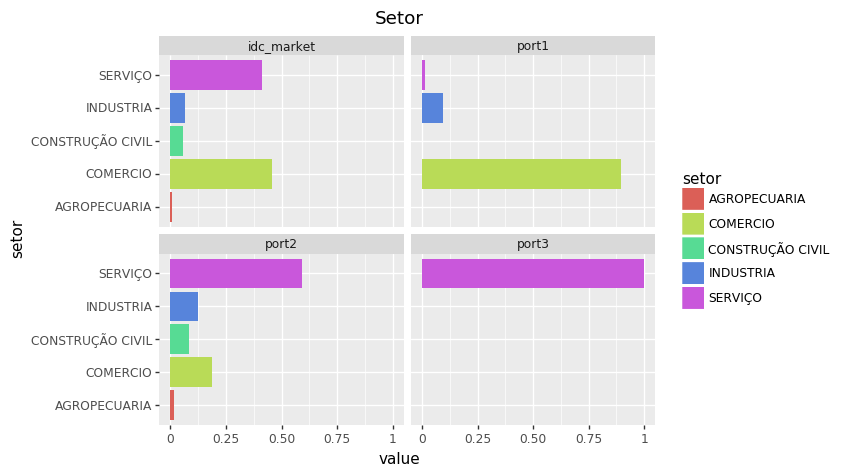

<ggplot: (8769778038481)>

In [66]:
d_setor = market.groupby('setor')['port1', 'port2', 'port3','idc_market'].sum().reset_index()
d_setor[['port1', 'port2', 'port3','idc_market']] = d_setor[['port1', 'port2', 'port3','idc_market']]/d_setor[['port1', 'port2', 'port3','idc_market']].sum()
d_setor = d_setor.melt('setor', ['port1', 'port2', 'port3','idc_market'])

# Plotando o gráfico
(ggplot(d_setor, aes(x = 'setor', y = 'value', fill = 'setor')) +
    geom_bar(stat = 'identity') + coord_flip() + facet_wrap('variable') + ggtitle('Setor'))

> *Verificando a distribuição da Natureza Juridica Macro*

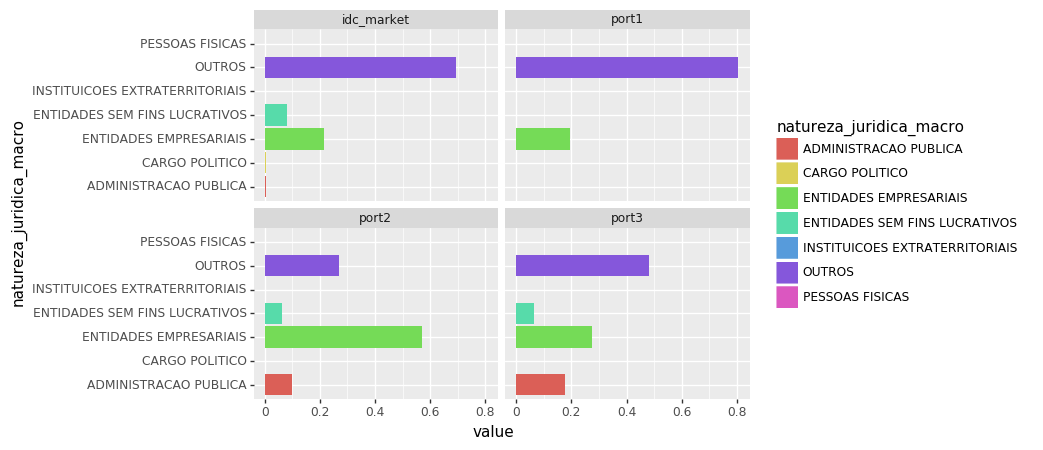

<ggplot: (8769771292513)>

In [67]:
d_nat_jur = market.groupby('natureza_juridica_macro')['port1', 'port2', 'port3','idc_market'].sum().reset_index()
d_nat_jur[['port1', 'port2', 'port3','idc_market']] = d_nat_jur[['port1', 'port2', 'port3','idc_market']]/d_nat_jur[['port1', 'port2', 'port3','idc_market']].sum()
d_nat_jur = d_nat_jur.melt('natureza_juridica_macro', ['port1', 'port2', 'port3','idc_market'])

# Plotando o gráfico
(ggplot(d_nat_jur, aes(x = 'natureza_juridica_macro', y = 'value', fill = 'natureza_juridica_macro')) +
    geom_bar(stat = 'identity') + coord_flip() + facet_wrap('variable'))

> *Como está a divisão pelo Segmento*

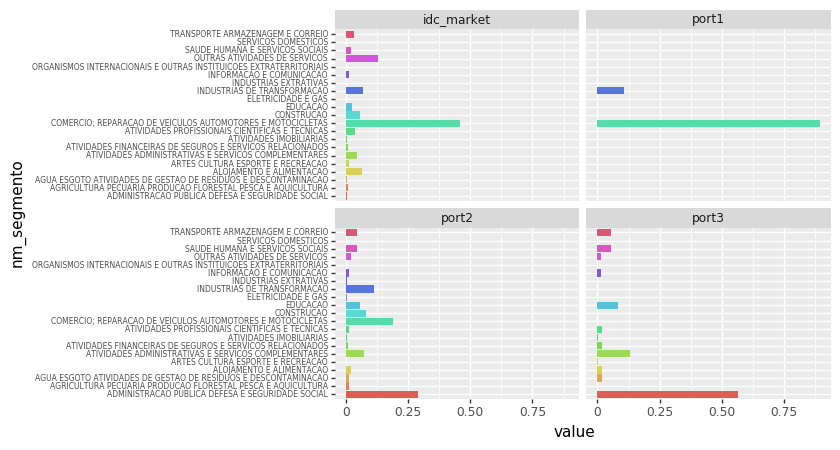

<ggplot: (8769772711077)>

In [68]:
d_nm_seg = market.groupby('nm_segmento')['port1', 'port2', 'port3','idc_market'].sum().reset_index()
d_nm_seg[['port1', 'port2', 'port3','idc_market']] = d_nm_seg[['port1', 'port2', 'port3','idc_market']]/d_nm_seg[['port1', 'port2', 'port3','idc_market']].sum()
d_nm_seg = d_nm_seg.melt('nm_segmento', ['port1', 'port2', 'port3','idc_market'])

# Plotando o gráfico
(ggplot(d_nm_seg, aes(x = 'nm_segmento', y = 'value', fill = 'nm_segmento')) +
    geom_bar(stat = 'identity') + coord_flip() + facet_wrap('variable') +
    theme(legend_position = "none", axis_text_y = element_text(size=5.5)))

> *Divisão por tipo de atividade*

In [69]:
d_nm_divisao = market.groupby('nm_divisao')['port1', 'port2', 'port3','idc_market'].sum().reset_index()
d_nm_divisao[['port1', 'port2', 'port3','idc_market']] = d_nm_divisao[['port1', 'port2', 'port3','idc_market']]/d_nm_divisao[['port1', 'port2', 'port3','idc_market']].sum()
d_nm_divisao.sort_values('idc_market', ascending = False)

,nm_divisao,port1,port2,port3,idc_market
30,COMERCIO VAREJISTA,0.893694,0.081272,0.000000,0.374489
14,ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS,0.000000,0.019435,0.011321,0.082507
3,ALIMENTACAO,0.000000,0.010601,0.015094,0.059821
28,COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E...,0.000000,0.037102,0.000000,0.048561
29,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,0.000000,0.070671,0.000000,0.035762
...,...,...,...,...,...
58,FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACE...,0.000000,0.000000,0.000000,0.000048
34,DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE...,0.000000,0.000000,0.000000,0.000026
66,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOE...,0.000000,0.000000,0.000000,0.000020
57,FABRICACAO DE PRODUTOS DO FUMO,0.000000,0.000000,0.000000,0.000004


> *Inserimos o valor OUTROS caso seja nulo nas variáveis `setor` e `nm_segmento`*

In [70]:
market['setor'] = np.where(market['setor'].isnull(), 'OUTROS', market['setor'])
market['nm_segmento'] = np.where(market['nm_segmento'].isnull(), 'OUTROS', market['nm_segmento'])

> Análise referente ao grupo `Sócios` <br>
> *Conseguimos observar que a quantidade de dados faltantes nos sócios são um pouco grande*

In [71]:
features_socios = ['qt_socios','qt_socios_pf','qt_socios_pj','idade_media_socios','idade_maxima_socios','idade_minima_socios','qt_socios_st_regular']
market[features_socios].isnull().sum() / market[features_socios].count() * 100

qt_socios               33.147661
qt_socios_pf            33.147661
qt_socios_pj            33.147661
idade_media_socios      48.794320
idade_maxima_socios     48.794320
idade_minima_socios     48.794320
qt_socios_st_regular    50.399016
dtype: float64

> *Inputamos nesses valores faltantes a mediana*

In [72]:
market[features_socios] = market[features_socios].fillna(0)

In [73]:
market.groupby(['qt_socios'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
qt_socios,,,
0.0,147.0,184.0,167.0
1.0,315.0,55.0,21.0
2.0,81.0,181.0,45.0
3.0,9.0,65.0,15.0
4.0,1.0,42.0,7.0
5.0,1.0,14.0,3.0
6.0,0.0,13.0,2.0
7.0,0.0,3.0,0.0
8.0,0.0,1.0,0.0


In [74]:
market.groupby(['qt_socios_pf'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
qt_socios_pf,,,
0.0,147.0,184.0,167.0
1.0,317.0,71.0,24.0
2.0,80.0,190.0,50.0
3.0,8.0,53.0,10.0
4.0,1.0,34.0,7.0
5.0,1.0,12.0,3.0
6.0,0.0,10.0,0.0
7.0,0.0,4.0,0.0
8.0,0.0,0.0,0.0


In [75]:
market.groupby(['qt_socios_pj'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
qt_socios_pj,,,
0.0,553.0,515.0,250.0
1.0,1.0,35.0,9.0
2.0,1.0,15.0,4.0
3.0,0.0,1.0,1.0
4.0,0.0,0.0,0.0
5.0,0.0,0.0,1.0
6.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0


In [76]:
market.groupby(['idade_media_socios'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
idade_media_socios,,,
-2.0,0.0,0.0,0.0
0.0,193.0,213.0,172.0
3.0,0.0,0.0,0.0
4.0,0.0,0.0,1.0
5.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0
7.5,1.0,0.0,0.0
8.0,0.0,0.0,0.0


In [77]:
market.groupby(['idade_maxima_socios'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
idade_maxima_socios,,,
-2.0,0.0,0.0,0.0
0.0,193.0,213.0,172.0
3.0,0.0,0.0,0.0
4.0,0.0,0.0,1.0
5.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0
9.0,1.0,0.0,0.0


In [78]:
market.groupby(['idade_minima_socios'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
idade_minima_socios,,,
-2.0,0.0,0.0,0.0
0.0,193.0,213.0,172.0
2.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0
4.0,0.0,0.0,1.0
5.0,0.0,0.0,0.0
6.0,1.0,0.0,0.0
7.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0


In [79]:
market.groupby(['qt_socios_st_regular'])['port1','port2','port3'].sum().head(10)

,port1,port2,port3
qt_socios_st_regular,,,
0.0,195.0,214.0,172.0
1.0,300.0,99.0,38.0
2.0,54.0,168.0,36.0
3.0,4.0,32.0,9.0
4.0,1.0,29.0,6.0
5.0,0.0,8.0,0.0
6.0,1.0,10.0,2.0
7.0,0.0,2.0,1.0
8.0,0.0,0.0,0.0


> *Criando uma nova coluna no qual saberemos a quantidade de sócios que estão pendente regularização na RF*

In [80]:
market['nao_regular'] = market['qt_socios'] - market['qt_socios_st_regular']

In [81]:
market.groupby(['nao_regular'])['port1','port2','port3'].sum().head(7)

,port1,port2,port3
nao_regular,,,
0.0,472.0,420.0,223.0
1.0,75.0,82.0,25.0
2.0,7.0,38.0,8.0
3.0,1.0,18.0,5.0
4.0,0.0,5.0,0.0
5.0,0.0,0.0,0.0
6.0,0.0,2.0,3.0


## > Início do modelo

> *Após todas as análises selecionamos algumas features que entendemos ser as que mais serão importantes para o modelo*

In [82]:
features = [
    'de_natureza_juridica',
    'idade_empresa_anos',
    'idade_emp_cat',
    'setor_privado',
    'faturamento_cat',
    'cli_mei',
    'cli_simples',
    'qt_filiais',
    'fl_spa',
    'nm_segmento',
    'setor',
    'nao_regular'
]

In [83]:
market[features].head()

,de_natureza_juridica,idade_empresa_anos,idade_emp_cat,setor_privado,faturamento_cat,cli_mei,cli_simples,qt_filiais,fl_spa,nm_segmento,setor,nao_regular
0,SOCIEDADE EMPRESARIA LIMITADA,14.457534,10 a 15,True,4.0,0,1,0,False,CONSTRUCAO,CONSTRUÇÃO CIVIL,0.0
1,EMPRESARIO INDIVIDUAL,1.463014,1 a 5,True,2.0,1,0,0,False,ALOJAMENTO E ALIMENTACAO,SERVIÇO,0.0
2,EMPRESARIO INDIVIDUAL,7.093151,5 a 10,True,1.0,1,1,0,False,TRANSPORTE ARMAZENAGEM E CORREIO,SERVIÇO,1.0
3,EMPRESARIO INDIVIDUAL,6.512329,5 a 10,True,2.0,0,1,0,False,OUTRAS ATIVIDADES DE SERVICOS,SERVIÇO,0.0
4,EMPRESARIO INDIVIDUAL,3.200000,1 a 5,True,2.0,0,1,0,False,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,SERVIÇO,1.0
